In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [ ]:
df = pd.concat((df_train, df_test), axis=0).reset_index(drop=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       999 non-null    float64
dtypes: float64(2)
memory usage: 15.8 KB


In [ ]:
df.isna().sum()

x    0
y    1
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = df.dropna().drop_duplicates()

In [ ]:
df.describe()

,x,y
count,999.000000,999.000000
mean,50.291291,50.319804
std,28.808925,29.089111
min,0.000000,-3.839981
25%,25.000000,25.185430
50%,50.000000,49.926397
75%,74.500000,74.475252
max,100.000000,108.871618


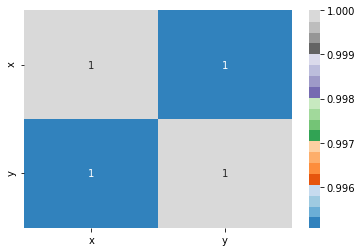

In [ ]:
sns.heatmap(df.corr(), annot = True, cmap="tab20c");

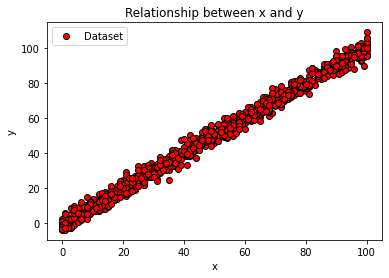

In [ ]:
plt.xlabel('x')
plt.ylabel('y')
plt.title('Relationship between x and y')
plt.plot(df.iloc[:,0],df.iloc[:,1],'ro', mec= 'k');
plt.legend(['Dataset']);

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42)
X_train = X_train.reset_index(drop=True) 
y_train = y_train.reset_index(drop=True) 
X_test = X_test.reset_index(drop=True) 
y_test = y_test.reset_index(drop=True) 

In [ ]:
m,n = X_train.values.shape
o,p = X_test.values.shape
X_train = pd.concat((pd.DataFrame(np.ones((m, 1)), columns= ['Bias']),X_train),axis=1)
X_test = pd.concat((pd.DataFrame(np.ones((o, 1)), columns= ['Bias']),X_test),axis=1)

In [ ]:
def LR_Cost(X: pd.DataFrame, y: pd.Series, theta: np.array) -> float:
    m, n = X.shape 
    residual = y - X @ theta
    CF_LR = (1/m) * (residual.T @ residual)
    return CF_LR

In [ ]:
def LS_NE(X: pd.DataFrame, y: pd.Series) -> np.array:
    return np.linalg.solve((X.T @ X), X.T @ y)

In [ ]:
def predict(X: pd.DataFrame, theta_estimate: np.array) -> pd.Series:
    return X @ theta_estimate

In [ ]:
class LinearRegression():
    def __init__(self):
        self.theta = None
    
    def fit(self, X: pd.DataFrame, y: pd.Series) -> np.array:
        self.theta = np.linalg.solve((X.T @ X), X.T @ y)

    def predict(self, X: pd.DataFrame) -> pd.Series:
        y_pred = X @ self.theta
        return y_pred
    
    def LR_Cost(self, X: pd.DataFrame, y: pd.Series) -> float:
        m, n = X.shape 
        residual = y - X @ self.theta
        CF_LR = (1/m) * (residual.T @ residual)
        return CF_LR

In [ ]:
pop_prof_model = LinearRegression()

In [ ]:
pop_prof_model.fit(X_train, y_train)

y_pred_train = pop_prof_model.predict(X_train)
y_pred_test = pop_prof_model.predict(X_test)

MSE_train = pop_prof_model.LR_Cost(X_train, y_train)
MSE_test = pop_prof_model.LR_Cost(X_test, y_test)
print("Theta estimates are: {}".format(pop_prof_model.theta))
print("Training dataset mean squared error: {}".format(MSE_train))
print("Test dataset mean squared error: {}".format(MSE_test))
print("Train dataset R2 score: {}".format(r2_score(y_train,y_pred_train)))
print("Test dataset R2 score: {}".format(r2_score(y_test,y_pred_test)))

Theta estimates are: [-0.29654476  1.00523472]
Training dataset mean squared error: 8.088375976934048
Test dataset mean squared error: 9.003332816736535
Train dataset R2 score: 0.9904790394652241
Test dataset R2 score: 0.9891879937675698


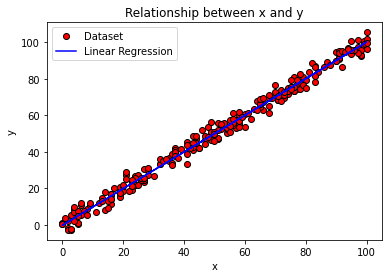

In [ ]:
plt.xlabel('x')
plt.ylabel('y')
plt.title('Relationship between x and y')
plt.plot(X_test.iloc[:,1],y_test,'ro', mec= 'k');
plt.plot(X_test.iloc[:,1],y_pred_test,'-b', mec= 'k');
plt.legend(['Dataset', 'Linear Regression']);